In [ ]:
!pip install kaggle

In [ ]:
# Mount Google Drive to access and save files in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creating a Kaggle Folder
!mkdir ~/.kaggle

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 428M/428M [00:11<00:00, 39.8MB/s]
100% 428M/428M [00:11<00:00, 39.5MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

**Importing Modules**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [ ]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk("/content/tess toronto emotional speech set data"):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_choice_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bath_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_keep_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_five_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_home_happy.wav']

In [ ]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [ ]:
#Create a Dataframe
df=pd.DataFrame()
df['Speech']=paths
df['Label']=labels
df.head(5)

,Speech,Label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [ ]:
df['Label'].value_counts()

,count
Label,
happy,400
ps,400
disgust,400
fear,400
neutral,400
sad,400
angry,400


**Exploratory Data Analysis (EDA)**

<Axes: xlabel='Label', ylabel='count'>

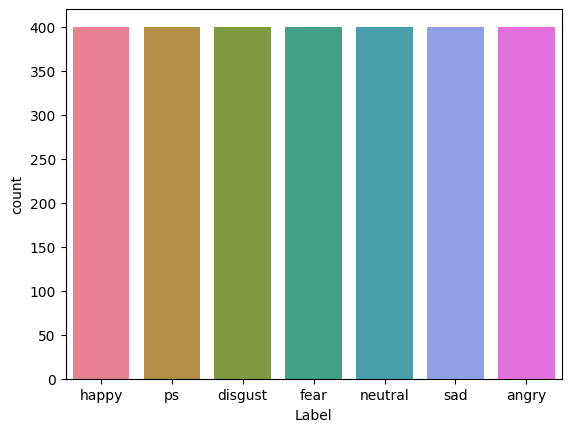

In [ ]:
#Generate a Palette with seven different colors
palette = sns.color_palette("husl", 7)
sns.countplot(data=df, x='Label',palette=palette)

In [ ]:
#function for displaying the waveplot
def waveplot(data,sr,emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()

#function for displaying the spectogram
def spectogram(data,sr,emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10.5,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Speech  2800 non-null   object
 1   Label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [ ]:
df['Speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_choice_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bath_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_keep_happy.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_soup_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_rat_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_take_sad.wav'],
      dtype=object)

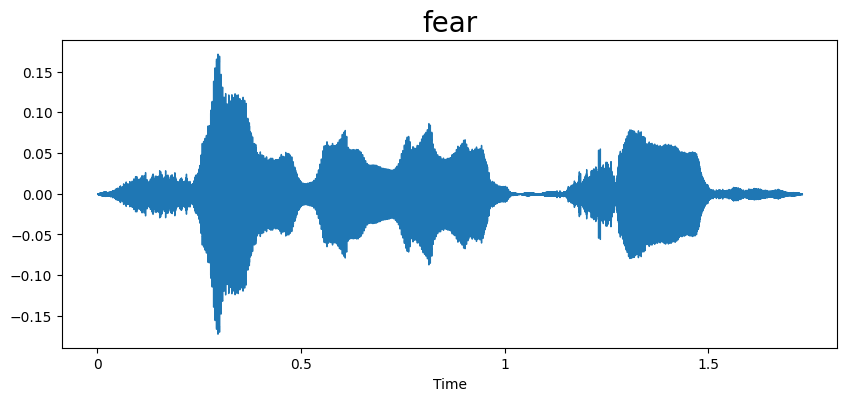

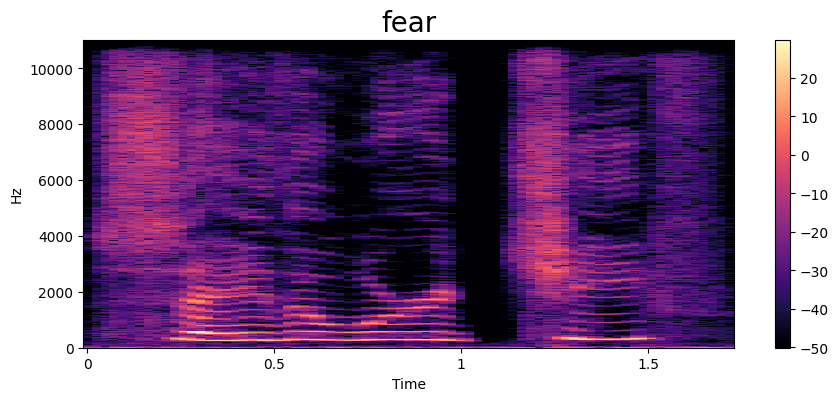

In [ ]:
emotion='fear'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

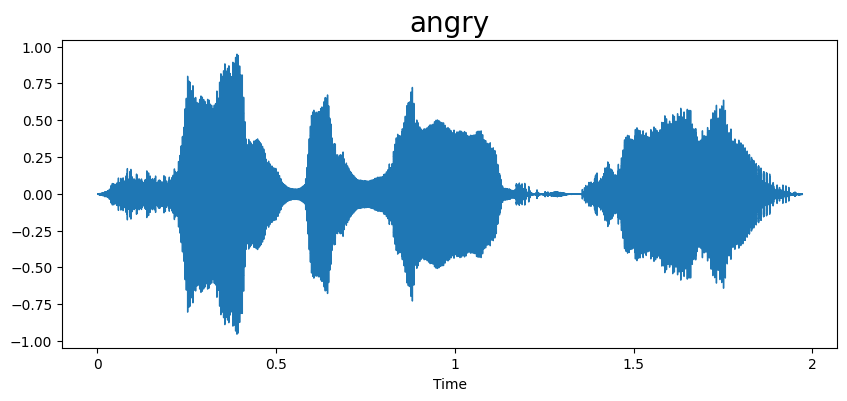

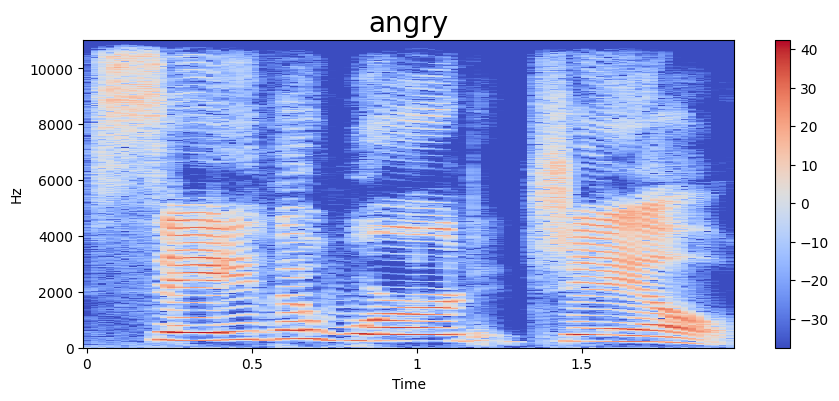

In [ ]:
emotion='angry'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

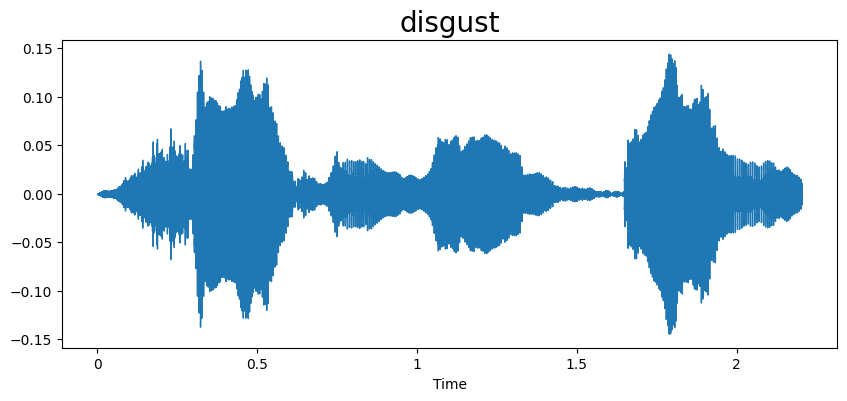

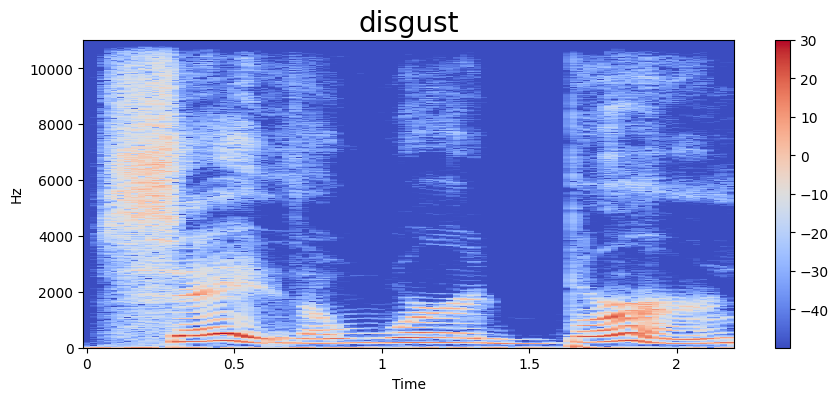

In [ ]:
emotion='disgust'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

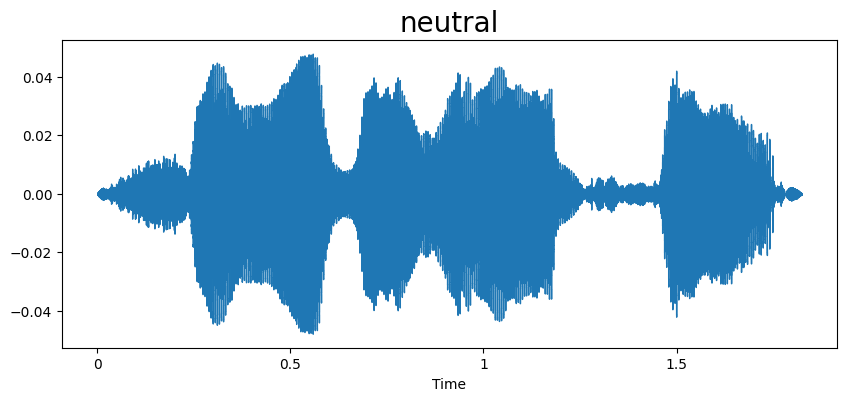

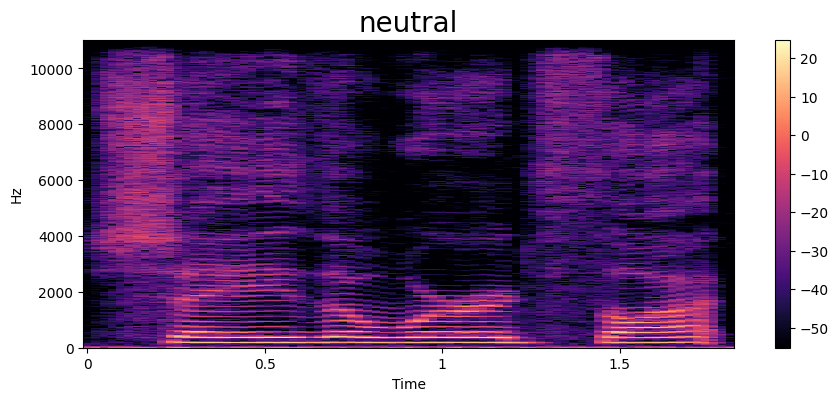

In [ ]:
emotion='neutral'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

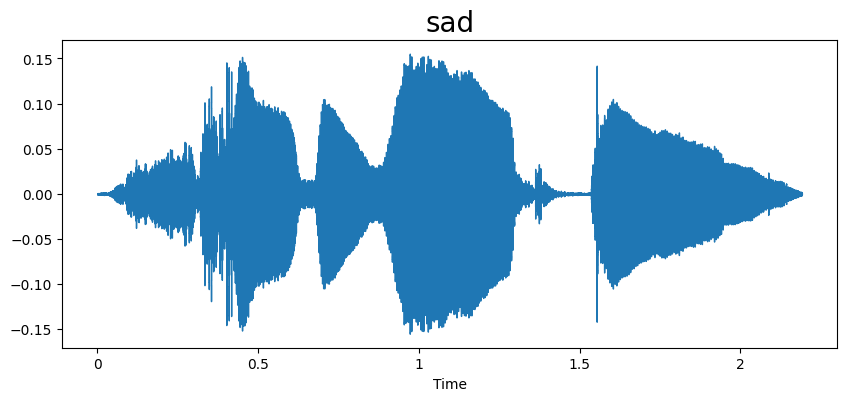

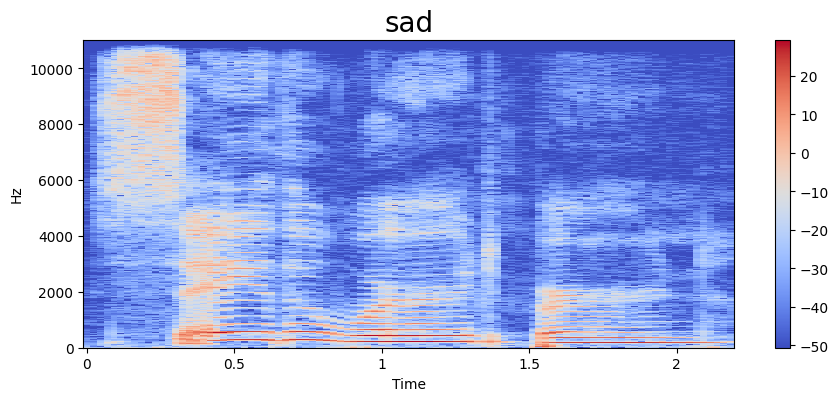

In [ ]:
emotion='sad'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

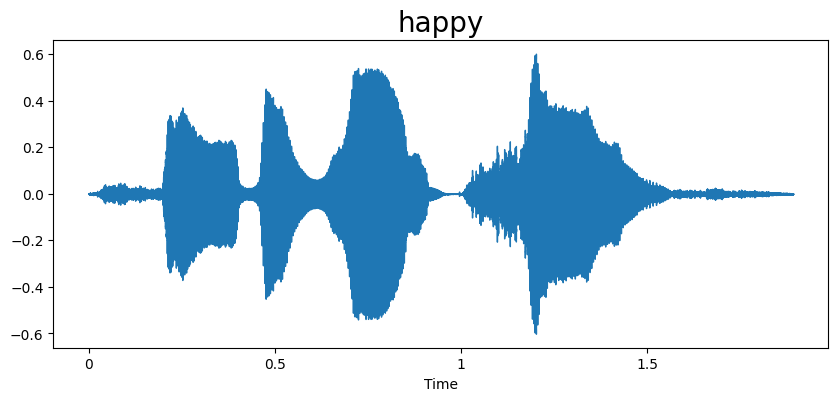

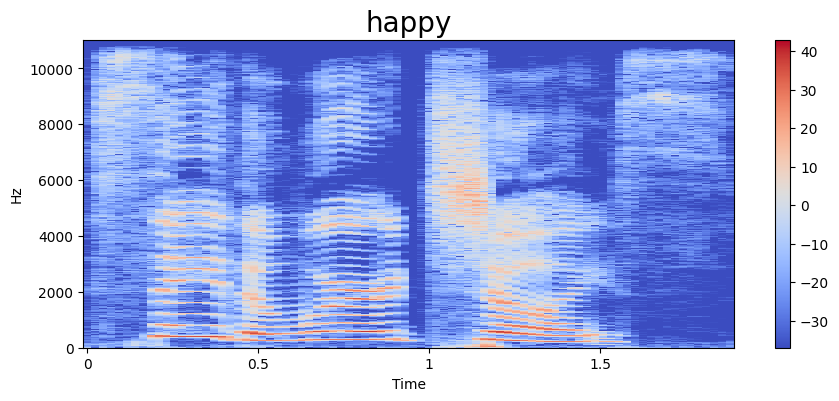

In [ ]:
emotion='happy'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

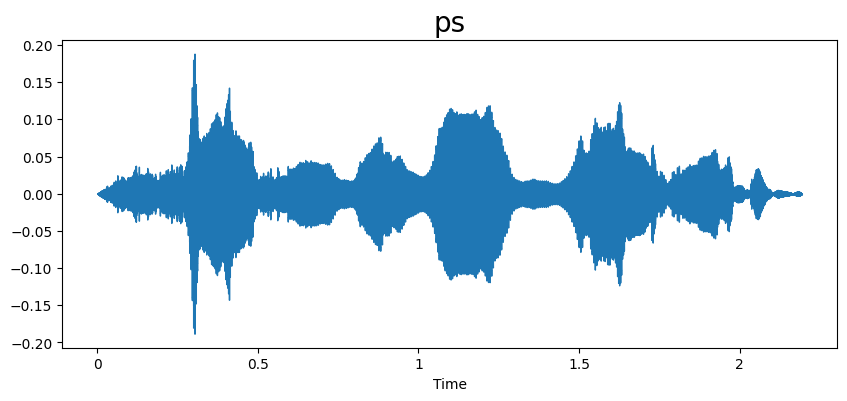

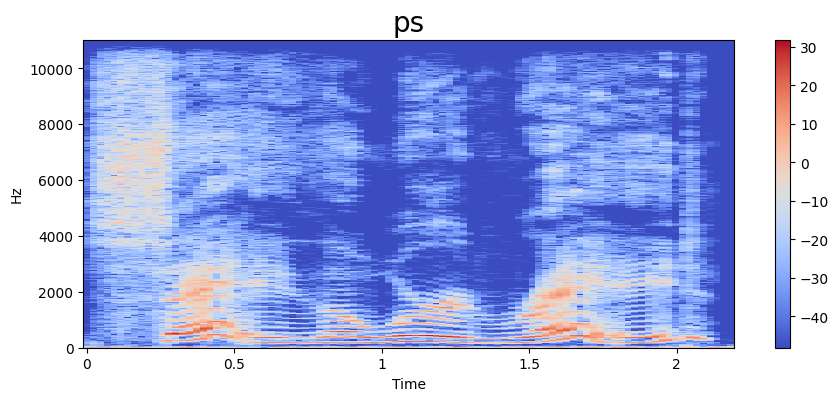

In [ ]:
emotion='ps'
path=np.array(df['Speech'][df['Label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

**Feature Extraction**

In [ ]:
#Extract MFCC features from a 3-second segment of an audio file
def extract_mfcc(filename):
  y,sr=librosa.load(filename,duration=3,offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['Speech'][0])

array([-3.1128497e+02,  2.6856783e+01, -2.0934541e+00,  2.0065714e+01,
       -5.8537159e+00, -1.0648099e+00, -9.8602266e+00, -1.3099748e+01,
       -6.2042820e-01, -3.3841033e+00, -1.0228091e+01,  1.4379949e+01,
       -1.4771661e+01,  8.3561449e+00, -5.6671681e+00, -8.3884935e+00,
        6.6017520e-01, -4.9793730e+00, -9.5137768e+00, -3.3714621e+00,
       -6.5885797e+00, -1.1926870e-01,  5.2013979e+00,  1.5053536e+01,
        1.1971814e+01,  1.2409558e+01,  3.5259578e+00,  3.8787417e+00,
        3.8336320e+00,  7.6574807e+00,  4.1173196e+00,  4.4731183e+00,
       -1.9474698e+00,  3.8008850e+00,  7.4393070e-01,  3.5535767e+00,
       -5.1680384e+00, -4.3906307e+00, -2.0464678e+00,  3.2261999e+00],
      dtype=float32)

In [ ]:
X_mfcc=df['Speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,Speech
0,"[-311.28497, 26.856783, -2.0934541, 20.065714,..."
1,"[-300.75027, 44.594646, -31.056608, 17.401653,..."
2,"[-352.5881, 27.351559, -11.7183, 40.08532, -11..."
3,"[-316.18353, 59.12807, -25.298468, 9.477226, -..."
4,"[-300.4762, 69.36828, -22.63918, 21.459663, -1..."
...,...
2795,"[-523.7277, 108.10713, 29.779913, 6.0399566, 1..."
2796,"[-557.2867, 110.496605, 39.969234, 14.031243, ..."
2797,"[-541.1807, 73.81706, 28.336828, 15.356872, 16..."
2798,"[-546.60815, 121.11583, 22.897217, -1.0657316,..."


In [ ]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [ ]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [ ]:
from  sklearn.preprocessing import OneHotEncoder
#OneHot encode the 'Label' column
enc=OneHotEncoder()
y=enc.fit_transform(df[['Label']])

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
#Train test split
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=2529)

**Create the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model:"Sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,shuffle=True)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2246 - loss: 1.8537 - val_accuracy: 0.6732 - val_loss: 0.9549
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5547 - loss: 1.1544 - val_accuracy: 0.7625 - val_loss: 0.6337
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6945 - loss: 0.8077 - val_accuracy: 0.8500 - val_loss: 0.3547
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7912 - loss: 0.5681 - val_accuracy: 0.9393 - val_loss: 0.2185
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8644 - loss: 0.4199 - val_accuracy: 0.9500 - val_loss: 0.1454
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9012 - loss: 0.3491 - val_accuracy: 0.9393 - val_loss: 0.1845
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9115 - loss: 0.3245 - val_accuracy: 0.9607 - val_loss: 0.1382
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9404 - loss: 0.2451 - val_accuracy: 0.9750 - val_loss

**Plotting the Results**

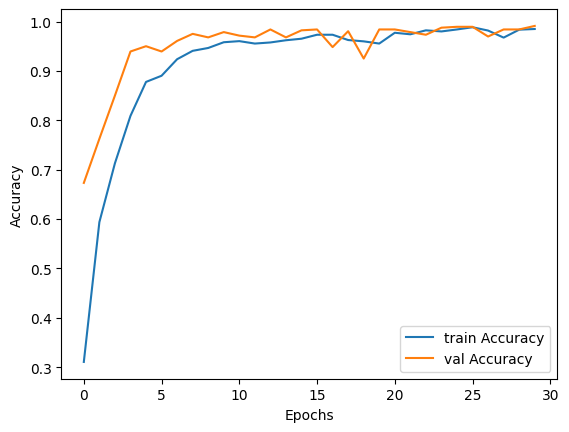

In [ ]:
epochs=list(range(30))
#Plot training and validation accuracy across epochs
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train Accuracy')
plt.plot(epochs,val_acc,label='val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

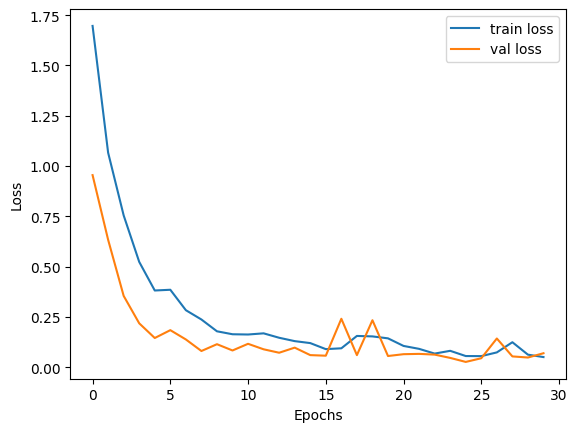

In [ ]:
#Plot training and validation Loss across epochs
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Confusion Matrix and Classification Report**

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_val_classes=np.argmax(y_test, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#Compute confusion Matrix
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)
print("Confusion Matrix: ")
print(conf_matrix)


Confusion Matrix: 
[[80  0  0  0  0  0  0]
 [ 0 74  0  0  0  1  0]
 [ 0  0 72  0  0  0  0]
 [ 0  0  0 84  0  0  0]
 [ 0  0  0  0 88  0  0]
 [ 0  1  0  3  0 78  0]
 [ 0  0  0  0  0  0 79]]


In [ ]:
#Print the Classification Report
target_names=['fear','angry','disgust','happy','neutral','ps','sad']
print("Classification Report")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

        fear       1.00      1.00      1.00        80
       angry       0.99      0.99      0.99        75
     disgust       1.00      1.00      1.00        72
       happy       0.97      1.00      0.98        84
     neutral       1.00      1.00      1.00        88
          ps       0.99      0.95      0.97        82
         sad       1.00      1.00      1.00        79

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



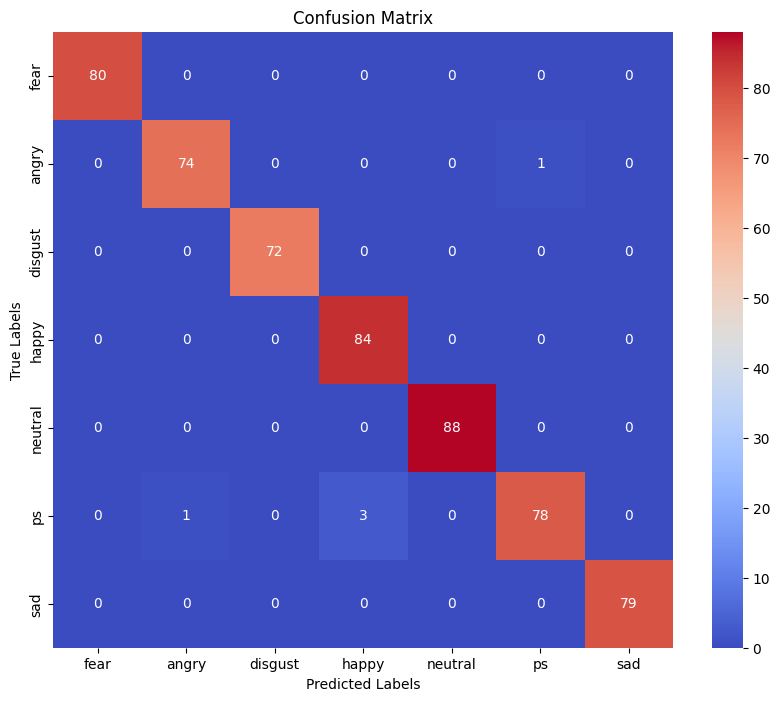

In [ ]:
# Visualize confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='coolwarm',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()